<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 1) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

The New York City Controller's Office maintains a database of the salary and benefits paid to city employees since the fiscal year 2013. This is data representing the Employee Compensation report.

**Year Type:**		Fiscal (July through June) or Calendar (January through December)<br>

**Year:**		An accounting period of 12 months. The New York City operates operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.<br>

**Employee Identifier:**		Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset.<br> 

**Salaries:**		Normal salaries paid to permanent or temporary City employees. <br>

**Overtime:**		Amounts paid to City employees working in excess of 40 hours per week. <br>

**Other Salaries:**		Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. <br>

**Total Salary:**		The sum of all salaries paid to City employees.<br>

**Retirement:**		City contributions to employee retirement plans. <br>

**Health/Dental:**		City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. <br>

**Other Benefits:**		Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.<br>

**Total Benefits:**		The sum of all benefits paid to City employees.<br>

**Total Compensation:**		The sum of all salaries and benefits paid to City employees.

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Outlier Analysis and Treatment](#outlier)**
    - 2.3 - **[Missing Value Analysis and Treatment](#null)**
    - 2.4 - **[Scale the Data](#scale)**
3. **[What is Regression Analysis?](#def)**
4. **[Bivariate Regression](#Bivariate)**
   - 4.1 - **[Ordinary Least Square Method (OLS)](#lsm)**
   - 4.2 - **[Measures of Variation](#mv)**
      - 4.2.1 - **[Sum of Squared Residuals (SSR)](#ssr)**
      - 4.2.2 - **[Sum of Squared Error (SSE)](#sse)**
      - 4.2.3 - **[Sum of Squared Total (SST)](#sst)**
      - 4.2.4 - **[Coefficient of Determination (R-Squared)](#r2)**
      - 4.2.5 - **[Standard Error of Estimate (SEE)](#see)**
   - 4.3 - **[Inferences about Slope and Intercept](#inf)**
      - 4.3.1 - **[Interpretation of Slope and Intercept](#inter)**
      - 4.3.2 - **[The t-test for Slope and Intercept](#t_test)**
      - 4.3.3 - **[Confidence Interval for Slope and Intercept](#ci)**
      - 4.3.4 - **[ANOVA for SLR](#anova)**
5. **[Multiple Linear Regression (MLR)](#MLR)**
    - 5.1 - **[Assumptions Before MLR Model](#before)**
        - 5.1.1 - **[Assumption on Dependent Variable](#dep_num)**
        - 5.1.2 - **[No or Little Multicollinearity](#no_multi)**
          - 5.1.2.1 - **[Correlation Matrix](#corr)**
          - 5.1.2.2 - **[Variance Inflation Factor (VIF)](#vif)**
    - 5.2 - **[Build the MLR Model](#model)** 
       - 5.2.1 - **[MLR Full Model](#full)**
       - 5.2.2 - **[MLR Model after Removing Insignificant Variables](#signi_var)**
       - 5.2.3 - **[MLR Model with Interaction Effect](#interaction)**
    - 5.3 - **[Assumptions After MLR Model](#assum)**
        - 5.3.1 - **[Linear Relationship between Dependent and Independent Variable](#linear_reln)**
        - 5.3.2 - **[Autocorrelation](#auto)**
        - 5.3.3 - **[Heteroskedasticity](#sked)**
        - 5.3.4 - **[Tests for Normality](#normality)**
6. **[Model Evaluation](#eval)**
    - 6.1 - **[R-Squared](#R_squared)**
    - 6.2 - **[Adjusted R-Squared](#Adj_R_test)**
    - 6.3 - **[Overall F-Test & p-value of the Model](#overall)**
7. **[Model Performance](#ml_perf)**
    - 7.1 - **[Mean Squared Error (MSE)](#mse)**
    - 7.2 - **[Root Mean Squared Error (RMSE)](#rmse)**
    - 7.3 - **[Mean Absolute Error (MAE)](#mae)**
    - 7.4 - **[Mean Absolute Percentage Error (MAPE)](#mape)**
8. **[Compare Model Performances](#compare)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
# store the data in 'df_compensation'
df_compensation = pd.read_csv('employee_compensation.csv')

# display first five observations using head()
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.220000,267.450000,267.450000,92823.120000,20700.200000,12500.560000,7605.750000,40806.510000,133629.630000
1,Calendar,2015,28248,1466.380000,348.230000,0.000000,1814.610000,0.000000,442.030000,141.590000,583.620000,2398.230000
2,Fiscal,2014,30651,76536.950000,13583.720000,10855.940000,100976.610000,18632.190000,12464.610000,8011.410000,39108.210000,140084.820000
3,Fiscal,2014,19473,45659.880000,0.000000,1625.370000,47285.250000,10081.200000,0.000000,3936.630000,14017.830000,61303.080000
4,Fiscal,2013,7176,41832.000000,0.000000,0.000000,41832.000000,7617.600000,5908.520000,3254.500000,16780.620000,58612.620000


**Let us now see the number of variables and observations in the data.**

In [3]:
# use 'shape' to check the dimension of data
df_compensation.shape

(50000, 12)

**Interpretation:** The data has 50000 observations and 12 variables.

**Get a concise summary of the DataFrame.**

In [4]:
# use 'info()' to understand the dataset
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


**Interpretation:** The variable `Year_Type` is categorical. All the other variables are numerical.

From the above output, we see that the data type of `Year` is 'int64'.

But according to the data definition, `Year` is categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [5]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'Year'
df_compensation['Year'] = df_compensation['Year'].astype(object)

#### Recheck the data type after the conversion. 

In [6]:
# recheck the data types using 'dtypes'
df_compensation.dtypes

Year_Type               object
Year                    object
Employee_Identifier      int64
Salaries               float64
Overtime               float64
Other_Salaries         float64
Total_Salary           float64
Retirement             float64
Health/Dental          float64
Other_Benefits         float64
Total_Benefits         float64
Total_Compensation     float64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Employee_Identifier` contains the id of the employee, which is redundant for further analysis. Thus, we drop the column.

In [7]:
# drop the column 'Employee_Identifier' using drop()
# 'axis = 1' drops the specified column
df_compensation = df_compensation.drop('Employee_Identifier',axis=1)

<a id="outlier"></a>
## 2.2 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

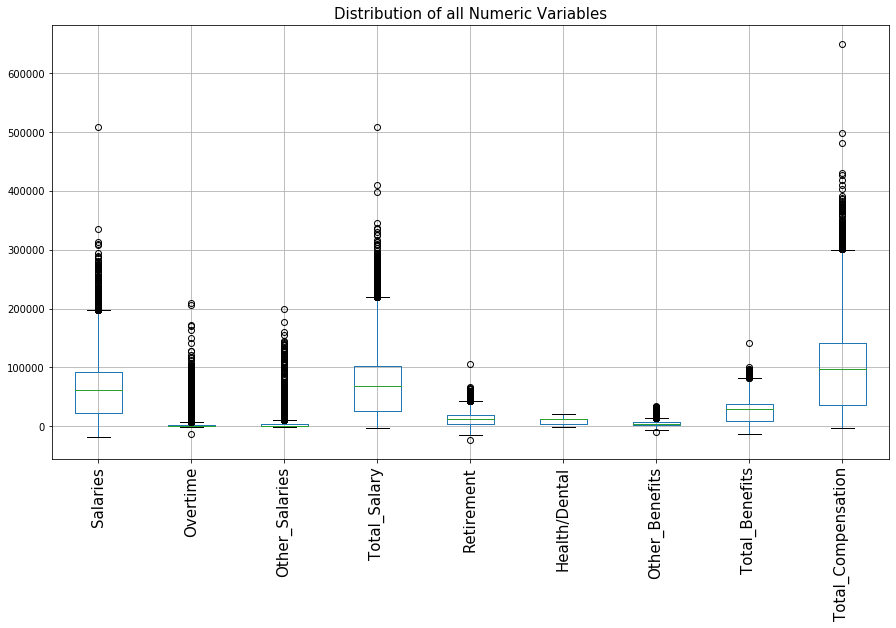

In [8]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_compensation.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' have a quite large range as compared to the other variables. Thus, it is difficult to see the outliers in such variables. So, we plot the boxplots of independent variables again by not considering the variables 'Salaries', 'Total_Salary' and 'Total_Compensation'. The variable Health/Dental has no outliers.**

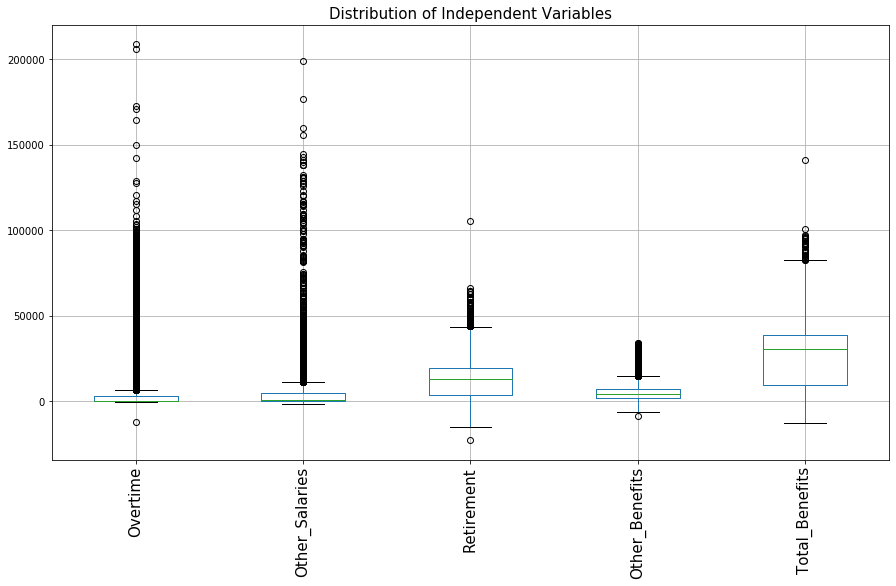

In [9]:
# boxplot of independent variables

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplots of all the numeric variables except the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' 
# use 'loc[]' to select the variables
df_compensation.loc[:,['Overtime', 'Other_Salaries', 'Retirement', 'Other_Benefits', 'Total_Benefits']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of the target (dependent) variable 'Total_Compensation'.**

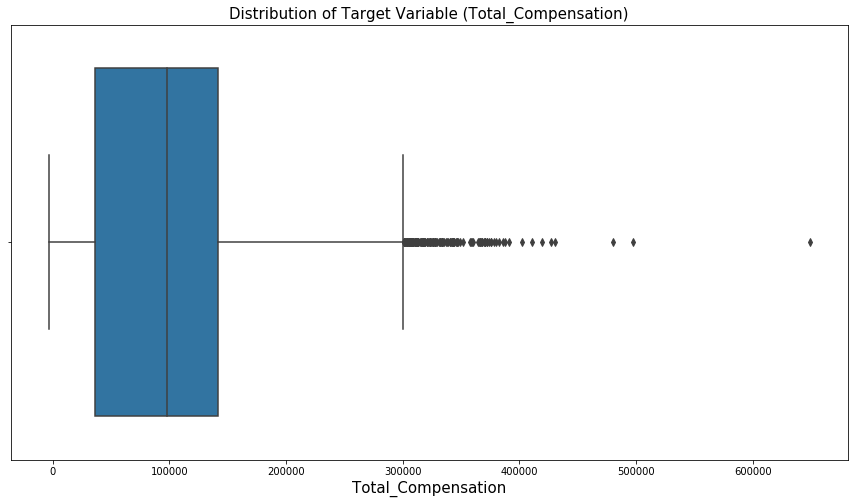

In [10]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplot for 'Total_Compensation' using seaborn library
sns.boxplot(df_compensation['Total_Compensation'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Total_Compensation)', fontsize = 15)
plt.xlabel('Total_Compensation', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [11]:
# calculate the first quartile
Q1 = df_compensation.quantile(0.25)

# calculate the third quartile
Q3 = df_compensation.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_compensation.shape

(37721, 11)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 2.3 Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [12]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_compensation.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_compensation.isnull().sum()*100/df_compensation.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Total_Compensation,0,0.000000
Total_Benefits,0,0.000000
Other_Benefits,0,0.000000
Health/Dental,0,0.000000
Retirement,0,0.000000
Total_Salary,0,0.000000
Other_Salaries,0,0.000000
Overtime,0,0.000000
Salaries,0,0.000000
Year,0,0.000000


**Interpretation:** There are no missing values in the data.

<a id="scale"></a>
## 2.4 Scale the Data

In [13]:
df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.220000,267.450000,267.450000,92823.120000,20700.200000,12500.560000,7605.750000,40806.510000,133629.630000
1,Calendar,2015,1466.380000,348.230000,0.000000,1814.610000,0.000000,442.030000,141.590000,583.620000,2398.230000
3,Fiscal,2014,45659.880000,0.000000,1625.370000,47285.250000,10081.200000,0.000000,3936.630000,14017.830000,61303.080000
4,Fiscal,2013,41832.000000,0.000000,0.000000,41832.000000,7617.600000,5908.520000,3254.500000,16780.620000,58612.620000
5,Calendar,2013,74132.000000,0.000000,1443.420000,75575.420000,14851.230000,12888.340000,6233.850000,33973.420000,109548.840000


In [14]:
# scale the independent numeric variables
df_compensation.iloc[:, 2:11] = df_compensation.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())

df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1.001727
1,Calendar,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,-1.304472
3,Fiscal,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,-0.269306
4,Fiscal,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,-0.316586
5,Calendar,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0.578543


<a id="def"></a>
# 3. What is Regression Analysis?

#### Dependent variable (y): It is the variable that we predict. It is also known as 'Target' or 'Response' variable. For regression, the dependent variable should be numeric.

#### Independent variable (X): It is the variable used in predicting the values of a target variable. There can be one or more independent variables in a dataset. It is also known as 'predictors' or 'features'. These variables can be numerical as well as categorical.

Regression analysis is used to understand the effect of a set of independent variables on the dependent variable. The variables that affect the dependent variable the most can also be identified. Linear regression is one of the methods in regression analysis, which fits the line to predict the values of the dependent variable.

<a id="Bivariate"></a>
# 4. Bivariate Regression

It determines the linear relationship between the dependent (y) and a independent (X) variable. It is also known as, `Simple Linear Regression (SLR)`. The mathematical equation is given as:<br>
<p style='text-indent:30em'> <strong> y = β<sub>0</sub> + β<sub>1</sub>.x + ε </strong> </p>
                                                        
where, 

y   =  Dependent variable <br>
x   =  Independent variable<br>
β<sub>0</sub>  =  Y-intercept (value of y when x = 0)<br>
β<sub>1</sub>  =  Beta coefficient of x <br>
ε   =  Random error component<br>

**For bivariate regression, consider 'Total_Compensation' as target variable and 'Total_Benefits' as an independent variable from 'df_compensation'.**

The test hypothesis for SLR is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: Slope (beta coefficient of x) is equal to zero</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: Slope (beta coefficient of x) is not equal to zero</strong> </p>

<a id="lsm"></a>
## 4.1 Ordinary Least Square Method (OLS)

The ordinary least square method aims to minimize the sum of the squared difference between the actual and the predicted values. Squaring ensures that each term is positive. It penalizes the model for the negative error terms. This approach calculates the β<sub>0</sub> and β<sub>1</sub> values that minimize the sum of squared differences along the line of prediction.

#### Split the data into training and test sets

In [15]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_compensation['Total_Benefits'], df_compensation['Total_Compensation'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (26404,)
y_train_slr (26404,)
X_test_slr (11317,)
y_test_slr (11317,)


**Build the simple linear regression model using the OLS method.**

In [16]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Total_Benefits
7580,1.000000,0.354816
15923,1.000000,1.316932
5380,1.000000,0.242893
9580,1.000000,-0.352773
3690,1.000000,-1.353940


In [17]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        12:53:17   Log-Likelihood:                 1460.8
No. Observations:               26404   AIC:                            -2918.
Df Residuals:                   26402   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0002      0.001     -0.

**Interpretation:** The R-squared value obtained from this model is 94.7 which means that the above model explains 94.7% of the variation in the Total_Compensation. 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.998) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (= 1) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

**Calculate the predicted Total_Compensation for train data using the above model.**

Use the above dataframe to predict the Total_Compensation.

In [18]:
# predict the Total_Compensation using 'predict()' on training data
y_train_slr_pred = SLR_model.predict(X_train_slr)

# display the first five predicted values 
y_train_slr_pred.head()

7580     0.345104
15923    1.281337
5380     0.236191
9580    -0.343450
3690    -1.317684
dtype: float64

Now we have actual and predicted values of the target variable for training dataset (y_train_slr and y_train_pred respectively)

<a id="mv"></a>
## 4.2 Measures of Variation

**Residual:** It is calculated as the difference between the actual and predicted value of the dependent variable.

<a id="ssr"></a>
### 4.2.1  Sum of Squared Residuals (SSR)

It is defined as the sum of the squared difference between the predicted value and the mean of the dependent variable.

In [19]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_slr_pred - y_train_slr.mean())**2)
ssr

24792.319612330157

<a id="sse"></a>
### 4.2.2 Sum of Squared Error (SSE)

It is defined as the sum of the squared difference between the actual value and the predicted value.

In [20]:
# calculate the SSE on train dataset
sse = np.sum((y_train_slr - y_train_slr_pred)**2)
sse

1384.010118201885

<a id="sst"></a>
### 4.2.3  Sum of Squared Total (SST)

It is the sum of the squared difference between the actual value and the mean of the dependent variable.

In [21]:
# calculate the SST on train dataset
sst = np.sum((y_train_slr - y_train_slr.mean())**2)
sst

26176.329730532045

In [22]:
# add the values of SSE and SSR
sse + ssr

26176.32973053204

**Interpretation:** From the abve putput, we can verify that SST (Total variation) is the sum of SSR and SSE.

<a id="r2"></a>
### 4.2.4 Coefficient of Determination (R-Squared)

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [23]:
# calculate R-Squared on train dataset
# use 'rsquared' method from statsmodel
r_sq = SLR_model.rsquared

# print the R-squared value
r_sq

0.9471274188379597

Now, we can also calculate the R-squared value using the formula (SSR/SST).

In [24]:
# calculate R-Squared on train dataset using the formula
r_sq = ssr/sst

# print the R-squared value
r_sq

0.9471274188379596

**Interpretation:** From the above output we can conclude that our model explains 94.71% variation in the Total_Compensation. We can also obtain this value from the summary of the model.

<a id="see"></a>
### 4.2.5 Standard Error of Estimate (SEE)

The SEE is the measure of the variability of actual values around the prediction line. Smaller the value of SEE better is the model.

In [25]:
# compute SEE using the below formula 
# see =  np.sqrt(sse/(len(train_data) - k))    

# for SLR take k = 2, as there are two coefficients (parameters) in the model
see = np.sqrt(sse/(len(X_train_slr) - 2))    
see

0.22895557304369393

Let us visualize the variability around the predicted line using regression plot.

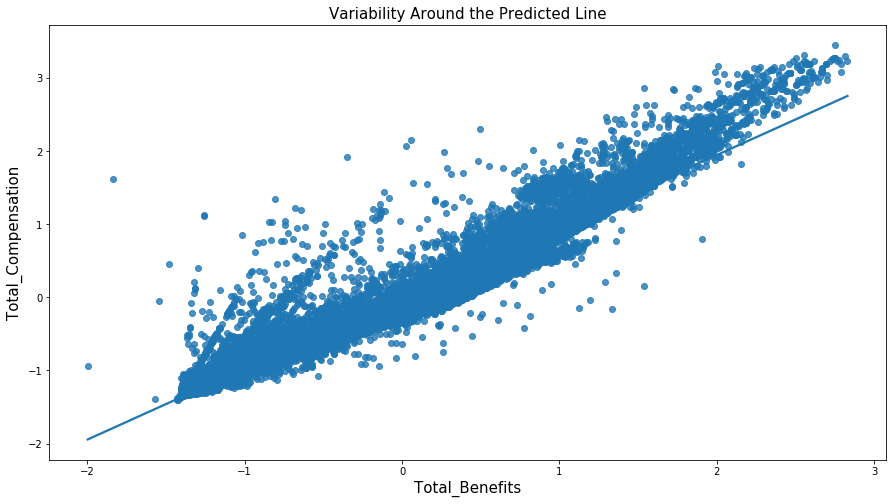

In [26]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a regression plot
# independent variable on x-axis and dependent variable on y-axis
sns.regplot(x = X_train_slr['Total_Benefits'], y = y_train_slr)

# add axes and plot labels
# set text size using 'fontsize'
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Total_Benefits', fontsize = 15)
plt.ylabel('Total_Compensation', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The blue line in the plot, indicates the regression line for the data. We can observe that most of the data points lie on (or near) the line. Also, some of the points are away from the line, which concludes the variation of the data to the fitted line. The shaded part in blue around the line shows the confidence interval for the regression line.

<a id="inf"></a>
## 4.3 Inferences about Slope and Intercept

Let us print the summary of the regression model (built in section 4.1).

In [27]:
# print the model summary
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        12:53:22   Log-Likelihood:                 1460.8
No. Observations:               26404   AIC:                            -2918.
Df Residuals:                   26402   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0002      0.001     -0.

Now, let us make some inferences about the output given above.

<a id="inter"></a>
### 4.3.1 Interpretation of Slope and Intercept

The output of the regression model returns the value of slope (β<sub>1</sub>) and Intercept (β<sub>0</sub>). 

**Intercept (β<sub>0</sub>) = -0.0002**, indicates that if the Total_Benefits is zero, then the average Total_Compensation is -0.0002. <br>

**The slope of 'Total_Benefits' (β<sub>1</sub>) = 0.9731**, indicates that by increasing the Total_Benefits percentage by 1%, the average Total_Compensation increases by 0.9731.


Thus, the equation of the line given by the model is:
<p style='text-indent:25em'> <strong> Total_Compensation = -0.0002 + 0.9731*(Total_Benefits) </strong>  </p>

<a id="t_test"></a>
### 4.3.2 The t-test for Slope and Intercept

The coefficient of regression captures the presence of a linear relationship between the independent and dependent variables. If the coefficient value is zero, we can infer that there is no linear relationship between the two variables which is statistically important. It is calculated as:
<p style='text-indent:28em'> <strong> t_value = coefficient / Standard_error </strong>  </p>

The test hypothesis for the t-test is given as:
<p style='text-indent:35em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> </p>
<p style='text-indent:35em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> </p>
                                    
Now, let us see how to calculate the t_test value for slope and intercept.

In [28]:
# perform t_test for intercept
# 'params[0]' returns the value of intercept 
# 'bse[0]' returns the standard error of intercept
t_intercept = SLR_model.params[0] / SLR_model.bse[0]

# print the value of t-statistic
t_intercept

-0.1186262297885362

In [29]:
# t_test for slope
# 'params[1]' returns the value of slope
# 'bse[1]' returns the standard error of slope
t_slope = SLR_model.params[1] / SLR_model.bse[1]

# print the value of t-statistic
t_slope

687.7132023629403

Now, let us see how to calculate the p-value associated with t_test value for slope and intercept.

In [30]:
# calculate p-value for intercept
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for intercept
# degrees of freedom = n - 1 = 1043 - 1 = 1042
pval = stats.t.sf(np.abs(t_intercept), 1042)*2 
pval

0.9055943477842103

In [31]:
# calculate p-value for slope
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for slope
# degrees of freedom = n - 1 = 1043 - 1 = 1042
pval = stats.t.sf(np.abs(t_slope), 1042)*2 
pval

0.0

**Interpretation:** The 'P > |t|' in the model summary indicates the p-value for the corresponding t-test. In our case, the p-value for the slope is zero i.e. p-value < 0.05 (with 5% level of significance). Thus, we can say that the slope is significant for the target variable.<br>
But, the p-value for the intercept is not zero i.e. p-value > 0.05 (with 5% level of significance). Thus, we can say that the intercept is insignificant for the target variable.

<a id="ci"></a>
### 4.3.3 Confidence Interval for Slope and Intercept

The 95% confidence interval for the variable implies that the value for the variable will be between the given interval for 95% of the cases. We can calculate the confidence interval as:

<p style='text-indent:28em'> <strong> CI = coefficient ± t_table_value*Standard_error </strong>  </p>

Here, 
t_table_value is obtained from the t-table with degrees of freedom (n-k) = (1043 - 2) = 1041 and 95% confidence level.

In [32]:
# CI for intercept
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_inter_min, CI_inter_max = SLR_model.params[0] - (1.9622*SLR_model.bse[0]), SLR_model.params[0] + (1.9622*SLR_model.bse[0])

# print the confidence interval for intercept 
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [-0.0029319285682736676, 0.002597634789115615]


In [33]:
# CI for slope
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_slope_min, CI_slope_max = SLR_model.params[1] - (1.9622*SLR_model.bse[1]), SLR_model.params[1] + (1.9622*SLR_model.bse[1])

# print the confidence interval for slope
print('CI for slope:', [CI_slope_min,CI_slope_max])

CI for slope: [0.9703214410276182, 0.9758743741623093]


<a id="anova"></a>
### 4.3.4 ANOVA for SLR

ANOVA (Analysis of Variance) is used to test the significance of the linear regression model. The test hypothesis for ANOVA is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> (i.e. regression model is significant) </p>

To perform ANOVA using `anova_lm` method, we build the SLR model using `ols` method in the statsmodel library.

In [34]:
# build a SLR model using 'ols' method
# pass the regression model to the parameter 'formula'
# concatenate the training dataset and pass to the parameter 'data' to build the model on training dataset
# 'axis=1' concats the data column-wise
# 'fit()' is used to fit the model
slr_ols = ols(formula = 'Total_Compensation ~ Total_Benefits', data = pd.concat([X_train_slr, y_train_slr], axis=1)).fit()
# this model returns the same result as of model built using 'OLS' 

In [35]:
# perform ANOVA on the above model using 'anova_lm'
# pass the linear model to 'anova_lm'
anova_slr = anova_lm(slr_ols)

# print the ANOVA results
anova_slr

,df,sum_sq,mean_sq,F,PR(>F)
Total_Benefits,1.000000,24792.319612,24792.319612,472949.448704,0.000000
Residual,26402.000000,1384.010118,0.052421,nan,nan


**Interpretation:** The above ANOVA result returns the F-statistic and corresponding p-value for the linear model. As, the p-value is less than 0.05, we accept the alternate hypothesis (i.e. the regression model is significant). We can also obtain these values from the summary of the model.

<a id="MLR"></a>
# 5. Multiple Linear Regression (MLR)

It is used to study the linear relationship between a dependent (target) variable and two or more independent variables. We can use this technique to study the effect of multiple variables on the target variable.

<a id="before"></a>
## 5.1 Assumptions Before MLR Model

There are several assumptions of linear regression. We can check two of them before building the regression model. Let us check the following assumptions in this section:<br>
1. Assumption on Dependent Variable<br>
2. No or little multicollinearity<br>

Let us create the dataframes for independent and target variable to check the assumptions of linear regression.

In [36]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

<a id="dep_num"></a>
### 5.1.1 Assumption on Dependent Variable

The assumption for linear regression is that the dependent (target) variable should be numeric. In our dataset, the variable 'Total_Compensation' is the target/dependent variable.  

In [37]:
# check the data type of dependent variable
df_target.dtype

dtype('float64')

**Interpretation:** The output shows that the data type of target variable is 'float64'. i.e. the dependent variable is numeric.

<a id="no_multi"></a>
### 5.1.2 No or Little Multicollinearity

Whenever there are a large number of independent variables present in the dataset, there is a possibility that such independent variables will be strongly correlated. The presence of a strong correlation between the independent variables is called multicollinearity.

The presence of multicollinearity can destabilize the model. Thus, the existence of multicollinearity must be detected and corrected actions should be taken.

If we use dummy variables to encode a categorical variable and do not omit the parent column, then this results in a strong correlation between the dummy variables and the parent column.

<a id="corr"></a>
#### 5.1.2.1 Correlation Matrix

Let us plot the heatmap to visualize the correlation matrix of the independent variables. The variables with a high correlation may induce multicollinearity in the data.

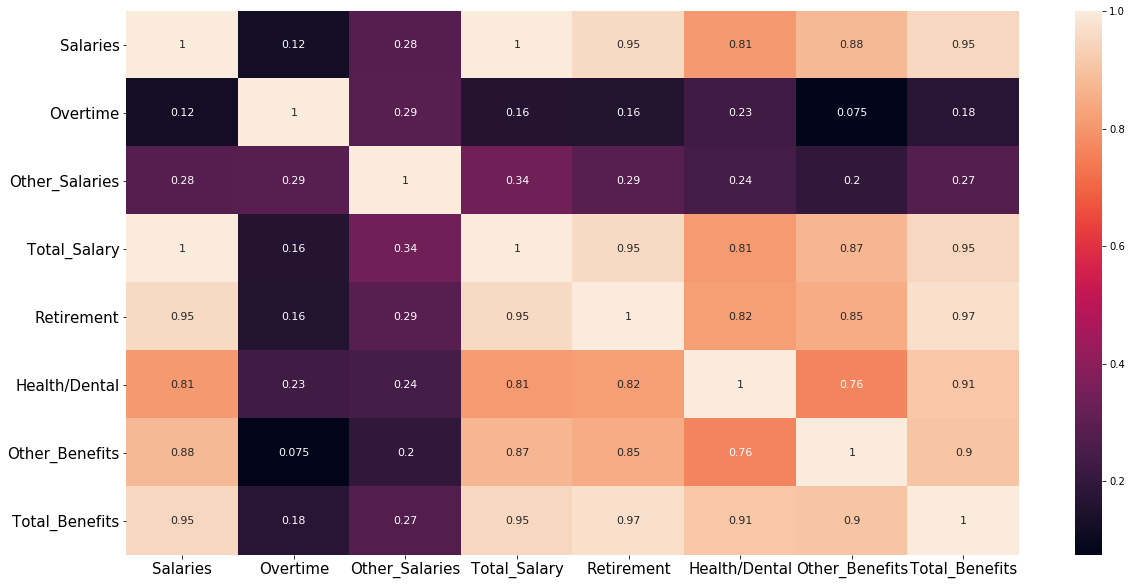

In [38]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

Identify the variables with a correlation greater than 0.6 and less than -0.6.

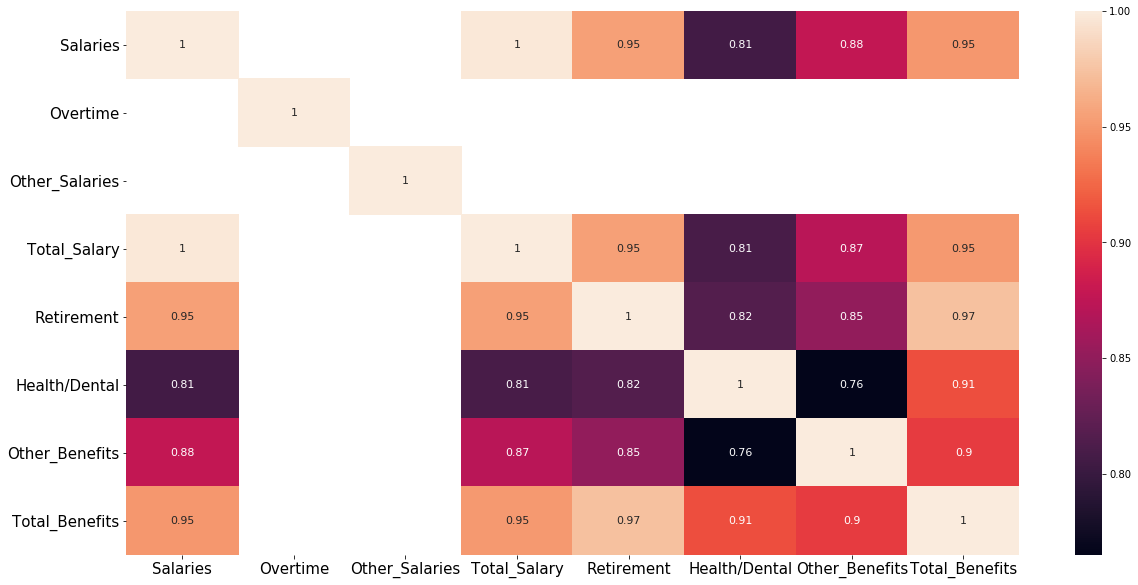

In [39]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark blue shade represent the strong positive correlation and the ones with lighter shade represent the strong negative correlation.

<a id="vif"></a>
#### 5.1.2.2 Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [40]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_feature.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits
0,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922
1,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191
3,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484
4,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973
5,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784


#### Calculate the VIF for each numeric variable.

In [41]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,302871086.960378,Total_Benefits
1,276118967.664109,Health/Dental
2,55639360.247011,Retirement
3,32109901.454055,Other_Benefits
4,30982752.278689,Overtime
5,29613799.212063,Total_Salary
6,14713019.966631,Other_Salaries
7,4599754.026275,Salaries


The output shows that the variable 'Total_Benefits' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)

In [42]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor        Features
0    1.158639        Overtime
1    1.174197  Other_Salaries
2    4.945172      Retirement
3    3.316296   Health/Dental
4    3.957369  Other_Benefits


In [43]:
# display the first 5 observations
df_numeric_features_vif.head()

,Overtime,Other_Salaries,Retirement,Health/Dental,Other_Benefits
0,-0.228091,-0.474919,1.178494,0.916565,1.145315
1,-0.167552,-0.587276,-1.180529,-1.491462,-1.259970
3,-0.428525,0.095551,-0.031662,-1.579733,-0.037039
4,-0.428525,-0.587276,-0.312417,-0.399832,-0.256852
5,-0.428525,0.019113,0.511937,0.994002,0.703228


**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "df_numeric_features_vif" to build the MLR model with significant variables.

<a id="model"></a>
## 5.2 Build the MLR Model

<a id="full"></a>
### 5.2.1 MLR Full Model

We use the OLS technique to predict the Total_Compensation by considering all the independent features in the data. 

#### Filter numerical and categorical variables

In [44]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

In [45]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits'],
      dtype='object')

In [46]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Year_Type', 'Year'], dtype='object')

The OLS method fails in the presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the categorical variable 'medincome' and create (n-1) dummy variables for n categories of 'medincome'.**

In [47]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)

In [48]:
encoded_data.head()

,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,1,0,1,0
1,0,0,1,0
3,1,1,0,0
4,1,0,0,0
5,0,0,0,0


#### Concatenate numerical and dummy encoded categorical variables.

In [49]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_compensation_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_compensation_dummy.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1,0,1,0
1,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,0,0,1,0
3,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,1,1,0,0
4,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,1,0,0,0
5,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data.

#### Split the data into training and test sets.

In [50]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_compensation_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (26404, 13)
y_train_full (26404,)
X_test_full (11317, 13)
y_test_full (11317,)


**Build the multiple linear regression model using the OLS method.**

In [51]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.261e+33
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:47   Log-Likelihood:             8.7740e+05
No. Observations:               26404   AIC:                        -1.755e+06
Df Residuals:                   26393   BIC:                        -1.755e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.977e-14   1.22e-17  

**Interpretation:** The R-squared value obtained from this model is 1.0 which means that the above model explains a 100% of the variation in the Total_Compensation. But, this can't be possible.<br> 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is far from 2 (= 2.013) which means there is autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

Also, the 'Cond. No' (1.94e+16) represents the `Condition Number (CN)` that is used to check the multicollinearity. 

If CN < 100: no multicollinearity.<br> 
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

#### Predict the Total_Compensation using X_test_full

In [52]:
y_pred_full = MLR_full_model.predict(X_test_full)

<a id="signi_var"></a>
### 5.2.2 MLR Model after Removing Insignificant Variables

Now, let us build the model using the categorical variable and the variables obtained from VIF. 

#### Filter numerical and categorical variables

In [53]:
# display numeric features obtained from VIF
df_numeric_features_vif.columns

Index(['Overtime', 'Other_Salaries', 'Retirement', 'Health/Dental',
       'Other_Benefits'],
      dtype='object')

In [54]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Year_Type', 'Year'], dtype='object')

The OLS method fails in the presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the categorical variables and create (n-1) dummy variables for n categories.**

In [55]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)

#### Concatenate numerical and dummy encoded categorical variables.

In [56]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_compensation_dummy = pd.concat([df_numeric_features_vif, encoded_data], axis=1)

# display first five observations
df_compensation_dummy.head()

,Overtime,Other_Salaries,Retirement,Health/Dental,Other_Benefits,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,-0.228091,-0.474919,1.178494,0.916565,1.145315,1,0,1,0
1,-0.167552,-0.587276,-1.180529,-1.491462,-1.259970,0,0,1,0
3,-0.428525,0.095551,-0.031662,-1.579733,-0.037039,1,1,0,0
4,-0.428525,-0.587276,-0.312417,-0.399832,-0.256852,1,0,0,0
5,-0.428525,0.019113,0.511937,0.994002,0.703228,0,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data.

#### Split the data into training and test sets.

In [57]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_signi_var'
X_signi_var = df_compensation_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_signi_var'
y_signi_var = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_signi_var = sm.add_constant(X_signi_var)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)

# print dimension of test set
print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (26404, 10)
y_train_signi_var (26404,)
X_test_signi_var (11317, 10)
y_test_signi_var (11317,)


**Build the multiple linear regression model using the OLS method.**

In [58]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model_vif = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 7.740e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:48   Log-Likelihood:                 6350.8
No. Observations:               26404   AIC:                        -1.268e+04
Df Residuals:                   26394   BIC:                        -1.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0439      0.003  

**Interpretation:** The R-squared value obtained from this model is 0.963 which means that the above model explains a 96.3% of the variation in the Total_Compensation. Also, we can see that the p-value for some variabels is greater than 0.05, we remove such variables and agan build the model.

Now, calculate the p-values for each variable and create a list of all insignificant variables in the model.

#### Calculate the p-values to know the insignificant variables

In [59]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_model_vif.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
Overtime,0.156583
Other_Salaries,0.000000
Retirement,0.000000
Health/Dental,0.000000
Other_Benefits,0.000000
Year_Type_Fiscal,0.059027
Year_2014,0.000000
Year_2015,0.000000
Year_2016,0.106320


**Interpretation:** The above table shows the p-value of each variable. Use this dataframe to identify the significant variables.

#### Create a list of insignificant variables.

In [60]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Overtime', 'Year_Type_Fiscal', 'Year_2016']

Now, build a model after removing the insignificant variables from the data.

In [61]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_train_signi_var = X_train_signi_var.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = X_test_signi_var.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.161e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:49   Log-Likelihood:                 6345.1
No. Observations:               26404   AIC:                        -1.268e+04
Df Residuals:                   26397   BIC:                        -1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0494      0.002     27.

**Interpretation:** From the above model summary, it can be observed that the p-value for all the variables is less than 0.05. Thus, all the variables are statistically significant. <br>

The R-squared value obtained from this model is 0.963 which means that the above model explains 96.3% of the variation in the Total_Compensation.<br>

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.987) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

Also, the 'Cond. No' (= 5.40) represents the `Condition Number (CN)` that is used to check the multicollinearity. 

If CN < 100: no multicollinearity.<br> 
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

#### Predict the Total_Compensation using X_test_signi_var

In [62]:
y_pred_signi_var = MLR_model_with_significant_var.predict(X_test_signi_var)

<a id="interaction"></a>
### 5.2.3 MLR Model with Interaction Effect

It occurs when the effect of one variable depends on the other variable. The combined effect of the variables may or may not improve the performance of the model.

We consider the combined effect of Other_Salaries and Other_Benefits.

In [63]:
df_interaction = df_compensation_dummy.copy()
df_interaction = df_interaction.drop(insigni_var, axis = 1)

# add the interaction variable in the original data
df_interaction['Other_Salaries*Other_Benefits'] = df_interaction['Other_Salaries']*df_interaction['Other_Benefits'] 

# print the data with interaction
df_interaction.head()

,Other_Salaries,Retirement,Health/Dental,Other_Benefits,Year_2014,Year_2015,Other_Salaries*Other_Benefits
0,-0.474919,1.178494,0.916565,1.145315,0,1,-0.543932
1,-0.587276,-1.180529,-1.491462,-1.259970,0,1,0.739951
3,0.095551,-0.031662,-1.579733,-0.037039,1,0,-0.003539
4,-0.587276,-0.312417,-0.399832,-0.256852,0,0,0.150843
5,0.019113,0.511937,0.994002,0.703228,0,0,0.013441


We build a multiple linear regression model considering all the significant variables and the interaction variable.

**Split the data into training and test sets.**

In [64]:
# set of independent variables
# create a copy of 'df_num' and store in the dataframe 'X_inter'
X_inter = df_interaction.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_inter'
y_inter = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_inter = sm.add_constant(X_inter)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(X_inter, y_inter, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_inter', X_train_inter.shape)
print('y_train_inter', y_train_inter.shape)

# print dimension of test set
print('X_test_inter', X_test_inter.shape)
print('y_test_inter', y_test_inter.shape)

X_train_inter (26404, 8)
y_train_inter (26404,)
X_test_inter (11317, 8)
y_test_inter (11317,)


**Build the model using OLS method.**

In [65]:
# build a model on training dataset
# 'sm.add_constant' adds the intercept to the model
# fit() is used to fit the OLS model
MLR_model_with_interaction = sm.OLS(y_train_inter, X_train_inter).fit()

# print the summary output
print(MLR_model_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:49   Log-Likelihood:                 6693.9
No. Observations:               26404   AIC:                        -1.337e+04
Df Residuals:                   26396   BIC:                        -1.331e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Interpretation:** The model with the interaction variable explains a 96.4% variation in the target variable. Thus, adding the interaction effect to the model with significant variabels increased the R-squared from 0.963 to 0.964.

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is near to 2 (=1.988) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (5.43) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

#### Predict the Total_Compensation using X_test_inter

In [66]:
y_pred_inter = MLR_model_with_interaction.predict(X_test_inter)

<a id="assum"></a>
## 5.3 Assumptions After MLR Model

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:
1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality 

<a id="linear_reln"></a>
### 5.3.1 Linear Relationship between Dependent and Independent Variable

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

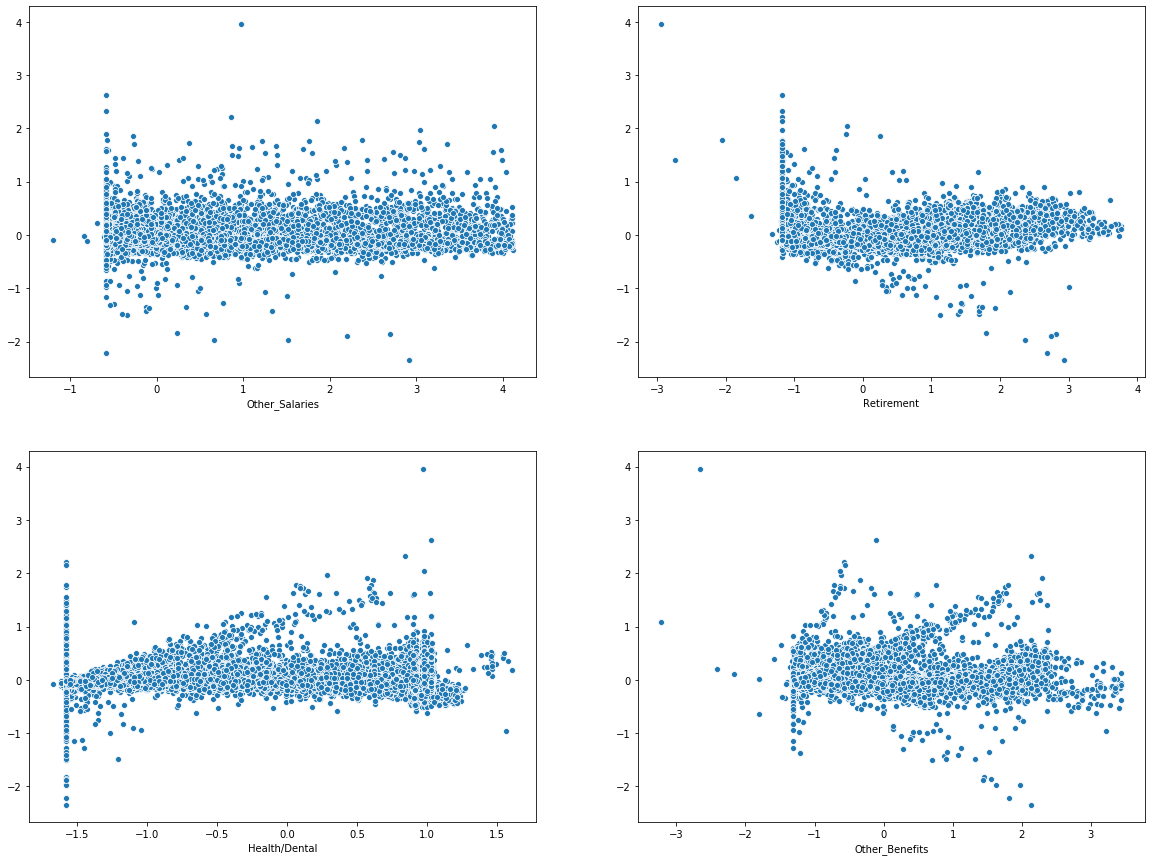

In [67]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_signi_var.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_signi_var[variable], MLR_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

<a id="auto"></a>
### 5.3.2 Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

In [68]:
# print the model summary
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.161e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:54   Log-Likelihood:                 6345.1
No. Observations:               26404   AIC:                        -1.268e+04
Df Residuals:                   26397   BIC:                        -1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0494      0.002     27.

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 1.987). Thus, we conclude that there is no autocorrelation.

<a id="sked"></a>
### 5.3.3 Heteroskedasticity

If the residuals have constant variance across different values of the predicted values, then it is known as `Homoskedasticity`. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of  heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [69]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model_with_significant_var.resid, MLR_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 138.9105277832695), ('p-value', 5.346835209131236e-174)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

<a id="normality"></a>
### 5.3.4 Tests for Normality

As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for the target variable.

<a id="qq"></a>
#### 1. Q-Q Plot

Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

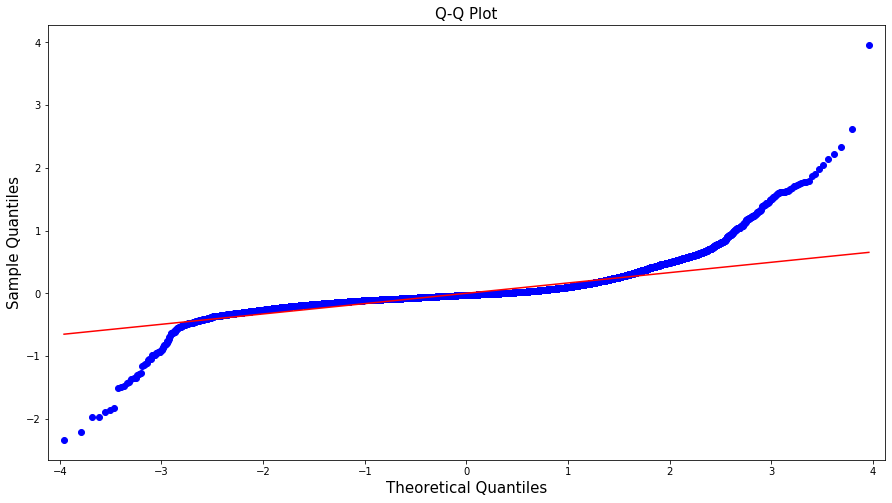

In [70]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_with_significant_var.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.

<a id="SWT"></a>
#### 2. Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [71]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model_with_significant_var.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.7506176829338074
P-Value: 0.0


**Interpretation:** From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

<a id="eval"></a>
# 6. Model Evaluation

In this section, we evaluate the model containing significant variables. 

Let us print the summary of the multiple regression model.

In [72]:
# print the model summary
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.161e+05
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        11:50:55   Log-Likelihood:                 6345.1
No. Observations:               26404   AIC:                        -1.268e+04
Df Residuals:                   26397   BIC:                        -1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0494      0.002     27.

<a id="R_squared"></a>
## 6.1 R-Squared

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [73]:
# calculate R-Squared on train dataset
# use 'rsquared' from statsmodel
r_sq_mlr = MLR_model_with_significant_var.rsquared

# print the value
r_sq_mlr

0.9634778786351557

**Interpretation:** The value of R-squared is 0.963. Thus, we conclude that the 96.3% variation in the Total_Compensation is explained by the model. We can also obtain this value from the summary of the model.

<a id="Adj_R_test"></a>
## 6.2 Adjusted R-Squared

It explains the percentage of variation by the independent variables that affect the target variable. The value of adjusted R-squared is always less than R-squared. 

In [74]:
# calculate adjusted R-Squared on train dataset
# use 'rsquared_adj' from statsmodel
adj_r_sq = MLR_model_with_significant_var.rsquared_adj

# print the value
adj_r_sq

0.9634695772096835

Now, we can also calculate the adjusted R-Squared value using the formula **1 - (((1 - R-Squared) * (n - 1)) / (n - k - 1))**.

Where,<br>k: Number of beta coefficients <br>
n: Total number of observations

In [75]:
# calculate adjusted R-Squared on train dataset using the formula
# 'n' denotes total number of observations
n = len(X_train_signi_var)

# 'k' denotes number of predictors (including the intercept)
k = len(X_train_signi_var.columns)

# calculate adjusted R-squared
# 'r_sq_mlr' represents the R-Squared value
adj_r_sq = 1 - (((1 - r_sq_mlr) * (n - 1)) / (n - k - 1))

# print the value
adj_r_sq

0.96346819327186

**Interpretation:** We can see that the value of adjusted R-squared calculated using the formula and the one obtained from the model are nearly same. We can also obtain this value from the summary of the model.

<a id="overall"></a>
## 6.3 Overall F-Test & p-value of the Model

F-test is used to checking whether the overall regression model is statistically significant or not. The F-statistic is given as:

<p style = 'text-indent:25em'> <strong> f_value = (R-squared / (k-1)) / ((1- R-squared) / n - k) </strong>  </p>

Where, 

k: Number of beta coefficients <br>
n: Total number of observations

The test hypothesis for F-test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: All β's are equal to zero </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: At least one β is not equal to zero </strong> (i.e. regression model is significant) </p>


In [76]:
# compute f_value using the below formula 
# f_value = (r_sq / k-1)/((1- r_sq)/n-k)

# k = number of beta coefficients
k = len(X_train_signi_var.columns)

# n = number of observations
n = len(X_train_signi_var)

# calculate value of F-statistic
# 'r_sq_mlr' represents the R-Squared value
f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))

# print the value
f_value

116061.73925963661

We can also obtain this value from the summary of the model.

Now, calculate the corresponding p-value for F-statistic. 

In [77]:
# calculate p-value for F-statistic
# use 'sf' (Survival function) from f-distribution to calculate the corresponding p-value

# degrees of freedom 
# dfn = k-1 = 6-1 = 5
# dfd = n-k = 1043-5 = 1038
p_val = stats.f.sf(f_value, dfn = 5, dfd = 1038)

# print the value
p_val

0.0

**Interpretation:** As, the p-value is less than 0.05, we accept the alternate hypothesis; i.e. the model is significant.

<a id="ml_perf"></a>
# 7. Model Performance

#### Let us do some predictions using the train and test dataset.

In [78]:
# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train_signi_var'
# y_train_signi_var: actual values of the target variable for the train dataset

# For testing set:
# test_pred: prediction made by the model on the test dataset 'X_test_signi_var'
# y_test_signi_var: actual values of the target variable for the test dataset

# predict the output of the target variable from the train data 
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = MLR_model_with_significant_var.predict(X_train_signi_var)

# predict the output of the target variable from the test data
test_pred = MLR_model_with_significant_var.predict(X_test_signi_var)

<a id="mse"></a>
## 7.1 Mean Squared Error (MSE)

It is defined as the average squared difference between the actual and predicted values.

In [79]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_signi_var, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_signi_var, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0362
Mean Squared Error (MSE) on test set:  0.0326


<a id="rmse"></a>
## 7.2 Root Mean Squared Error (RMSE)

It is defined as the square root of MSE. Lower the value of RMSE, better is the fit of the regression line.

In [80]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_signi_var, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_signi_var, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.1903
Root Mean Squared Error (RMSE) on test set:  0.1806


<a id="mae"></a>
## 7.3 Mean Absolute Error (MAE)

It is defined as the average of the absolute difference between the actual and predicted values.

In [81]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_signi_var, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_signi_var, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.1122
Mean Absolute Error (MAE) on test set:  0.1095


<a id="mape"></a>
## 7.4 Mean Absolute Percentage Error (MAPE)

It is used to measure the accuracy of the model as a percentage. We define a function to calculate MAPE for training and test dataset.

In [82]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [83]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train_signi_var, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_signi_var, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  60.4356
Mean Absolute Percentage Error (MAPE) on test set:  58.363


<a id="compare"></a>
# 8. Compare Model Performances

Let us compare the model performance metrics (MSE, RMSE, MAE, MAPE) for `MLR_full_model`, `MLR_model_with_significant_var` and `MLR_interaction_model` to find the best model.

In [84]:
# create the table for all the model performance metrics
# metrics considered for model comparision are MSE, RMSE, MAE and MAPE
# create a list of column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

Now, calculate performance measure for `MLR_full_model`

In [85]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test_full, y_pred_full),
                     'RMSE': rmse(y_test_full, y_pred_full),
                     'MAE': mean_absolute_error(y_test_full, y_pred_full),
                     'MAPE': mape(y_test_full, y_pred_full)
                   })

# append the values to the result table
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


Now, calculate performance measure for `MLR_model_with_significant_var`

In [86]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for model with significant variables
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_model_signi_var_metrics = pd.Series({'Model_Name': "MLR Model with Significant Variables",
                     'R-squared': MLR_model_with_significant_var.rsquared,
                     'Adj. R-squared': MLR_model_with_significant_var.rsquared_adj,
                     'MSE': mean_squared_error(y_test_signi_var, y_pred_signi_var),
                     'RMSE': rmse(y_test_signi_var, y_pred_signi_var),
                     'MAE': mean_absolute_error(y_test_signi_var, y_pred_signi_var),
                     'MAPE': mape(y_test_signi_var, y_pred_signi_var)
                   })

# append the values to the result table
result_table = result_table.append(MLR_model_signi_var_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,MLR Model with Significant Variables,0.963478,0.963470,0.032626,0.180627,0.109455,58.363001


Now, calculate the performance measures for `MLR_model_with_interaction`

In [87]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for model with interaction
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_model_interaction_metrics = pd.Series({'Model_Name': "MLR Model with Interaction",
                     'R-squared': MLR_model_with_interaction.rsquared,
                     'Adj. R-squared': MLR_model_with_interaction.rsquared_adj,
                     'MSE': mean_squared_error(y_test_inter, y_pred_inter),
                     'RMSE': rmse(y_test_inter, y_pred_inter),
                     'MAE': mean_absolute_error(y_test_inter, y_pred_inter),
                     'MAPE': mape(y_test_inter, y_pred_inter)
                   })

# append the values to the result table
result_table = result_table.append(MLR_model_interaction_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,MLR Model with Significant Variables,0.963478,0.963470,0.032626,0.180627,0.109455,58.363001
2,MLR Model with Interaction,0.964430,0.964421,0.031791,0.178300,0.107083,56.906872


**Interpretation:** The R-Squared and the Adj. R-Squared for the full model (=1) indicates that the model perfectly fits the data which is not practical and also the model is likely to overfit. Thus, MLR Full Model cannot be considered as the best model.<br>

Overfitting occurs when a model learns the detail and noise in the training data to the extent that it adversely impacts the model's performance on the new data. We will learn about overfitting in the upcoming portion.<br>

On the other hand, R-Squared and the Adj. R-Squared for the MLR Model with Interaction is more than the MLR Model with Significant Variables. Also, the RMSE value for the MLR Model with Interaction is less as compared to that of MLR Model with Significant Variables.<br>
Thus, we can say that the MLR Model with Interaction is the best model.

